In [1]:
import os 
import pandas as pd
from collections import defaultdict
import numpy as np 
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

In [2]:
# Path saving 
gene_eq_path = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_TEST_conf2_annotFrame_cap0_runs/TCGA_Breast_1102'


In [3]:
plot_dir = '/cluster/work/grlab/projects/projects2020_OHSU/plots'
plot_dir = os.path.join(plot_dir, 'MS_single_sample_plots', 'debugging')
os.mkdir(plot_dir)
base_plot = 'v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA'
save_suffix = 'fix-sample_filtered-spladder'

FileExistsError: [Errno 17] File exists: '/cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging'

In [ ]:
print(plot_dir)

In [4]:
# Read intermediate file 
df_plot = pd.read_csv(os.path.join(gene_eq_path, 
                                   'exp_427_kmers_plot2_fix-sample_filtered-spladder.csv.gz'),
                                  #'exp_427_kmers_plot2_fix-sample.csv.gz' #'exp_427_kmers_plot2.csv.gz', #exp_427_kmers_plot
                      compression = 'gzip' )

/cluster/home/prelotla/software/anaconda3/envs/myimmuno3_light/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,7,8,9,10,11,15,1120,1125) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [18]:
df_plot[df_plot['readFrameAnnotated_kmer'].isna()]['kmer'].unique()

array([nan], dtype=object)

In [19]:
df_plot[df_plot['readFrameAnnotated'].isna()]['kmer'].unique()

array([nan], dtype=object)

In [15]:
df_plot.groupby(['readFrameAnnotated_kmer']).count()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAWTAB4401A11RA41B07all,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
readFrameAnnotated_kmer,,,,,,,,,,,,,,,,,,,,,
0.0,247229,247229,247229,247229,247229,247229,247229,247229,247229,247229,...,247209,247209,247209,247209,247209,247229,247229,247229,197447,197447
1.0,53405,53405,53405,53405,53405,53405,53405,53405,53405,53405,...,53405,53405,53405,53405,53405,53405,53405,53405,40291,40291


In [14]:
df_plot.groupby(['readFrameAnnotated']).count()


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,junctionAnnotated,origin,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
readFrameAnnotated,,,,,,,,,,,,,,,,,,,,,
0.0,239562,239562,239562,239562,239562,239562,239562,239562,239562,239562,...,239542,239542,239542,239542,239562,239562,239562,239562,191298,191298
1.0,30049,30049,30049,30049,30049,30049,30049,30049,30049,30049,...,30049,30049,30049,30049,30049,30049,30049,30049,22340,22340
0,20364,20364,20364,20364,20364,20364,20364,20364,20364,20364,...,20364,20364,20364,20364,20364,20364,20364,20364,15806,15806
0.0,6940,6940,6940,6940,6940,6940,6940,6940,6940,6940,...,6940,6940,6940,6940,6940,6940,6940,6940,5504,5504
0/1,606,606,606,606,606,606,606,606,606,606,...,606,606,606,606,606,606,606,606,461,461
1,2251,2251,2251,2251,2251,2251,2251,2251,2251,2251,...,2251,2251,2251,2251,2251,2251,2251,2251,1708,1708
1.0,862,862,862,862,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,621,621


In [6]:
samples = ['TCGA-BH-A18V-01A-11R-A12D-07.all', 
        'TCGA-C8-A12P-01A-11R-A115-07.all', 
        'TCGA-AO-A0JM-01A-21R-A056-07.all', 
        'TCGA-A2-A0SX-01A-12R-A084-07.all',
        'TCGA-A2-A0D2-01A-21R-A034-07.all']

In [7]:
df_plot.head()

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,spladder_GTEX_on_disk,strand_spladder
0,2,56.0,1.0,0.0,0.0,ENSG00000060339.14,68737048_68742427,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,1.0,+
1,2,57.0,1.0,0.0,0.0,ENSG00000060339.14,68742430_68742487,AAAALQQHS,0,0,...,6.0,0.0,0.0,3.0,True,0.0,0.0,970.0,NaN,NaN
2,4,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128637027,AAADGVLSV,0,1,...,156.0,164.0,112.0,651.0,True,1.0,0.0,1100.0,1.0,-
3,5,12.0,0.0,0.0,1.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,1.0,-
4,6,12.0,0.0,0.0,0.0,ENSG00000119333.11,128640690_128636438,AAADGWTMG,0,1,...,2.0,1.0,0.0,4.0,True,1.0,0.0,972.0,1.0,-


In [8]:
# # TEST 
# grp = df_plot.groupby(['>pepID',
#  "includes_5'",
#  "includes_3'",
#  'gene',
#  'kmer',
#  'peptide',
#  'sample',
#  'percentile_rank',
#  'affinity',
#  'strand',
#  'GTEX_presence',
#  'index',
#  'isCrossJunction',
#  'recurrence']).count()

# grp = grp.loc[grp['jx_pos'] == 2 , :]

# grp = grp.reset_index()

# test = df_plot.set_index('>pepID')

# test = test.loc[grp['>pepID']]

# test =test.drop_duplicates() # 3 exons only 

In [9]:
# # TEST 
# # kmers from 3 exon derived peptides
# test.loc[test['sample'] == 'TCGABHA18V01A11RA12D07all', 'kmer'].unique() 

In [10]:
# Some type conversions
# df_plot['junctionAnnotated'] = df_plot['junctionAnnotated'].astype(str)
# df_plot['readFrameAnnotated'] = df_plot['readFrameAnnotated'].astype(str)

In [11]:
# Annotate MHC
df_plot['MHC-I binding status'] = 'not computed'

df_plot.loc[df_plot['percentile_rank'] <=2 ,
            'MHC-I binding status'] = 'strong binding'
df_plot.loc[ (10 >= df_plot['percentile_rank']) &
              (df_plot['percentile_rank'] > 2), 
            'MHC-I binding status'] = 'weak binding'
df_plot.loc[ 10 < df_plot['percentile_rank'] ,
            'MHC-I binding status'] = 'not binding'

In [12]:
df_plot.columns

Index(['>pepID', 'jx_pos', 'between_codons', 'includes_5'', 'includes_3'',
       'gene', 'jx_coord', 'kmer', 'readFrameAnnotated', 'junctionAnnotated',
       ...
       'TCGAXXA89A01A11RA36F07all', 'TCGAZ7A8R501A42RA41B07all',
       'TCGAZ7A8R601A11RA41B07all', 'isCrossJunction',
       'junctionAnnotated_kmer', 'readFrameAnnotated_kmer', 'recurrence',
       'spladder_GTEX_on_disk', 'strand_spladder', 'MHC-I binding status'],
      dtype='object', length=1127)

In [13]:
meta_cols = [ col for col in df_plot.columns if 'TCGA' not in col ] 
cohort = [ col for col in df_plot.columns if 'TCGA' in col ] 

In [14]:
meta_cols

['>pepID',
 'jx_pos',
 'between_codons',
 "includes_5'",
 "includes_3'",
 'gene',
 'jx_coord',
 'kmer',
 'readFrameAnnotated',
 'junctionAnnotated',
 'origin',
 'peptide',
 'sample',
 'percentile_rank',
 'affinity',
 'strand',
 'GTEX_presence',
 'index',
 'isCrossJunction',
 'junctionAnnotated_kmer',
 'readFrameAnnotated_kmer',
 'recurrence',
 'spladder_GTEX_on_disk',
 'strand_spladder',
 'MHC-I binding status']

In [15]:
df_plot['spladder_GTEX_on_disk'] = df_plot['spladder_GTEX_on_disk'].fillna(0)
df_plot['GTEX_presence'] = df_plot['GTEX_presence'].fillna(0)

# VERY IMPORTANT Correction for kmers from multiple junctions
If a kmer comes from multiple junction, its expression value is already the maximum of these junctions. Therefore, we need to remove a kmer if any of its junctions of origin is seen in GTEX

In [18]:
# df_group = df_plot.groupby(['kmer']).sum()
# display(df_group.shape)
# not_GTEX_cross_samples = df_group.loc[df_group['GTEX_presence'] == 0, :].reset_index()[['kmer']]
# df_plot_c = df_plot.merge(not_GTEX_cross_samples, on = 'kmer', how = 'right')

In [19]:
# Do fill NAS, DO TEST 

In [20]:
df_group = df_plot.groupby(['kmer']).sum()
display(df_group.shape)

# Group spladder GTEX status per kmer
not_GTEX_cross_samples_spladder = df_group.loc[(df_group['spladder_GTEX_on_disk'] == 0) 
                                               , :].reset_index()[['kmer']]
not_GTEX_cross_samples_spladder['spladder_GTEX_on_disk'] = 0 

# Group GTEX status per kmer
not_GTEX_cross_samples = df_group.loc[ (df_group['GTEX_presence'] == 0)
                                               , :].reset_index()[['kmer']]
not_GTEX_cross_samples['GTEX_presence'] = 0 

# Merge back with plotting dataframe
df_plot_c = df_plot.drop(['spladder_GTEX_on_disk', 'GTEX_presence'], axis = 1
                        ).merge(not_GTEX_cross_samples_spladder, on = 'kmer', how = 'left')
df_plot_c = df_plot_c.merge(not_GTEX_cross_samples, on = 'kmer', how = 'left')

df_plot_c['spladder_GTEX_on_disk'] = df_plot_c['spladder_GTEX_on_disk'].fillna(1)
df_plot_c['GTEX_presence'] = df_plot_c['GTEX_presence'].fillna(1)

(30082, 1115)

In [21]:
df_plot.shape

(913535, 1127)

In [22]:
df_plot_c.shape

(913535, 1127)

In [23]:
df_plot_c['GTEX_presence'].unique()

array([1., 0.])

# Debug 3 GTEX versions

In [24]:
# df_plot_c.loc[(df_plot_c['GTEX_presence'] !=0 ) & 
#               (df_plot_c['spladder_GTEX_on_disk'] == 0 ) &
#               ((df_plot_c['junctionAnnotated'] == 0.0) | 
#                    (df_plot_c['junctionAnnotated'] == np.nan) |
#                     (df_plot_c['junctionAnnotated'] == '0.0') | 
#                     (df_plot_c['junctionAnnotated'] == '0') | 
#                     (df_plot_c['junctionAnnotated'] == 'nan/0') |
#                     (df_plot_c['junctionAnnotated'] == '0/nan') ) ,
#               ['GTEX_presence', 'spladder_GTEX_on_disk', 'jx_coord',
#                'kmer', 'junctionAnnotated_kmer', 'recurrence', 'origin']]

# Exploration 

In [37]:
myplot_collect = {}

In [38]:
Xlabel = 'Recurrence (>0 reads) across 1102 BRCA samples'
Ylabel = 'k-mer count'
save = True

### All 

In [39]:
#TODO Create the histogram plotting function. Note, for now very exploratory 

number of kmers 29786
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSUBRCA-cohort-_GTEX-k-mers-with-any-expression-support-Total-k-mers-passing-filter29757.png


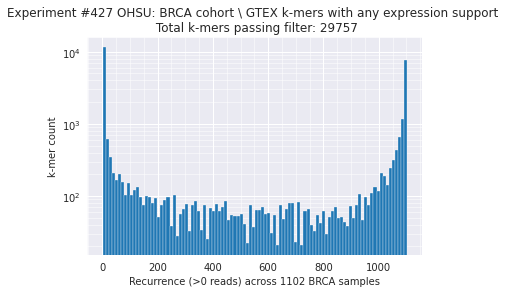

In [82]:
tmp = df_plot_c.loc[(df_plot_c['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])



ax = sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2)
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
#ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace( '\ ', '_').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()

# tmp = df_plot_c.loc[(df_plot_c['recurrence'] > 30),
#                   ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
# myplot_collect['original ohsu result recurrence > 30'] = set(tmp['kmer'].values)

### Remove if present in GTEX Graph  

number of kmers 3176
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSUBRCA-cohort-_GTEX-k-mers-with-any-expression-support-Removed-k-mers-present-in-GTEX-spladder-graph-Total-k-mers-passing-filter3174.png


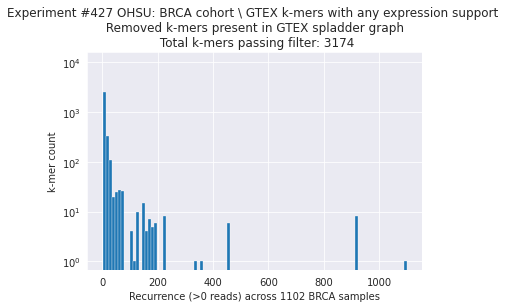

In [83]:
tmp = df_plot_c.loc[df_plot_c['GTEX_presence'] == 0
                   & (df_plot_c['recurrence'] > 0),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers present in GTEX spladder graph \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace( '\ ', '_').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()


tmp = df_plot_c.loc[df_plot_c['GTEX_presence'] != 0
                   & (df_plot_c['recurrence'] > 30),
                  ['recurrence', 'kmer', 'GTEX_presence' ]].drop_duplicates()
myplot_collect['In GTEX Graph' ] = set(tmp['kmer'].values)

### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide)

In [32]:
df_plot['junctionAnnotated_kmer'].unique()

array([ 0.,  1., nan])

number of kmers 10446
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSUBRCA-cohort-_GTEX-k-mers-with-any-expression-support-Removed-k-mers-from-annotated-junctions-Total-k-mers-passing-filter10423.png


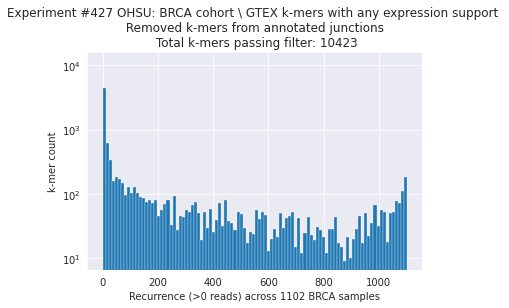

In [100]:
tmp = df_plot_c.loc[df_plot_c['junctionAnnotated_kmer'] == 0
                   & (df_plot_c['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers from annotated junctions \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace( '\ ', '_').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()


tmp = df_plot_c.loc[df_plot_c['junctionAnnotated_kmer'] != 0
                   & (df_plot_c['recurrence'] > 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
myplot_collect['Junction annotated' ] = set(tmp['kmer'].values)

number of kmers 10446
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSUBRCA-cohort-_GTEX-k-mers-with-any-expression-support-Removed-k-mers-from-annotated-junctions-Total-k-mers-passing-filter10423.png


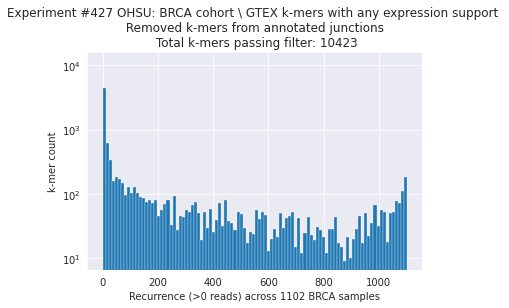

In [84]:
tmp = df_plot_c.loc[df_plot_c['junctionAnnotated_kmer'] == 0
                   & (df_plot_c['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers from annotated junctions \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace( '\ ', '_').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()


tmp = df_plot_c.loc[df_plot_c['junctionAnnotated_kmer'] != 0
                   & (df_plot_c['recurrence'] > 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
myplot_collect['Junction annotated' ] = set(tmp['kmer'].values)

In [59]:
df_plot['junctionAnnotated'].unique()

array([0.0, 1.0, nan, '0.0', '0', '1', '0/1', '1.0', 'nan/0', '0/nan'],
      dtype=object)

In [60]:
# Do Remove all the other annoatated status (from peptide files)

number of kmers 11138


<AxesSubplot:xlabel='recurrence', ylabel='Count'>

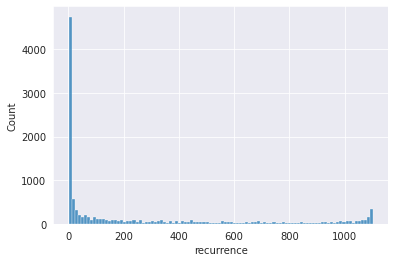

In [61]:
tmp = df_plot_c.loc[((df_plot_c['junctionAnnotated'] == 0.0) | 
                   (df_plot_c['junctionAnnotated'] == np.nan) |
                    (df_plot_c['junctionAnnotated'] == '0.0') | 
                    (df_plot_c['junctionAnnotated'] == '0') | 
                    (df_plot_c['junctionAnnotated'] == 'nan/0') |
                    (df_plot_c['junctionAnnotated'] == '0/nan') ) &
                   (df_plot_c['recurrence'] > 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100)

#tmp = tmp.loc[(tmp['recurrence'] > 30) , :]
#myplot_collect['original ohsu result recurrence > 30 \ Junction annotated' ] = tmp['kmer'].values

### Remove if Present in the GTEX spladder counts

In [62]:
df_plot_c['strand_spladder'].unique()

array(['+', nan, '-'], dtype=object)

number of kmers 947
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSUBRCA-cohort-_GTEX-k-mers-with-any-expression-support-Removed-k-mers-present-in-GTEX-counts-filtered-by-spladder-Total-k-mers-passing-filter947.png


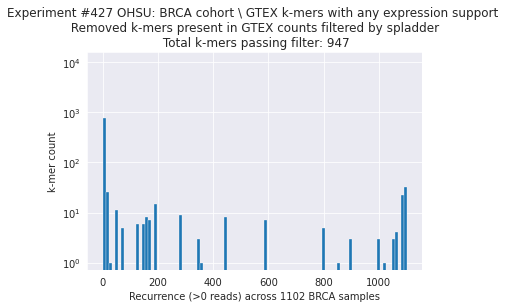

In [85]:
tmp = df_plot_c.loc[df_plot_c['spladder_GTEX_on_disk'] == 0
                   & (df_plot_c['recurrence'] > 0), 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers present in GTEX counts filtered by spladder \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace( '\ ', '_').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()




tmp = df_plot_c.loc[df_plot_c['spladder_GTEX_on_disk'] != 0
                   & (df_plot_c['recurrence'] > 30), 
                  ['recurrence', 'kmer']].drop_duplicates()
myplot_collect['GTEX spladder junctions' ] = set(tmp['kmer'].values)

### Combination 
### Remove if kmer comes from an annotated junction (or on the same 3-exon peptide) 
### Remove GTEX junctions with graph 
### Remove if in pladder counts

number of kmers 744
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_removed_GTEX_spladder_annot.png


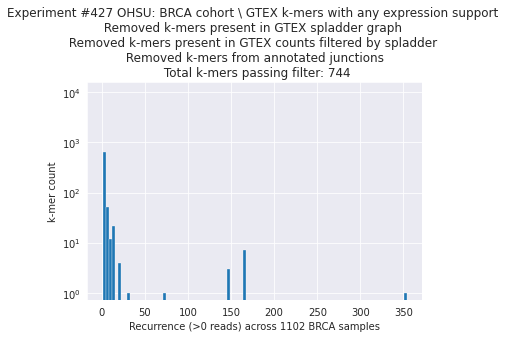

In [86]:
tmp = df_plot_c.loc[((df_plot_c['junctionAnnotated'] == 0.0) | 
                   (df_plot_c['junctionAnnotated'] == np.nan) |
                    (df_plot_c['junctionAnnotated'] == '0.0') | 
                    (df_plot_c['junctionAnnotated'] == '0') | 
                    (df_plot_c['junctionAnnotated'] == 'nan/0') |
                    (df_plot_c['junctionAnnotated'] == '0/nan') ) &
                    
                   (df_plot_c['recurrence'] > 0) &
                    
                  (df_plot_c['GTEX_presence'] == 0) & 
                    (df_plot_c['spladder_GTEX_on_disk'] == 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)

n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers present in GTEX spladder graph  \n Removed k-mers present in GTEX counts filtered by spladder  \n Removed k-mers from annotated junctions \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         'removed_GTEX_spladder_annot'
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()


#tmp = tmp.loc[(tmp['recurrence'] > 30) , :]
#myplot_collect['original ohsu result recurrence > 30 \ GTEX spladder junctions and GTEX graph and Junction annot' ] = tmp['kmer'].values

In [87]:
tmp.head()

,recurrence,kmer
1492,1.0,AGPESLRSK
2014,3.0,AKLPLLCSN
2564,1.0,ALTNSAASS
3085,73.0,APKSGFEGI
3126,1.0,APPSSPKDP


In [88]:
to_check = tmp.loc[(tmp['recurrence'] > 10)
                   & (tmp['recurrence'] <50), :].merge(df_plot_c, on = 'kmer', how = 'left')


In [89]:
to_check[['recurrence_x', 'gene', 'jx_coord' , 'kmer']]

,recurrence_x,gene,jx_coord,kmer
0,11.0,ENSG00000171102.14,133208468_133207945,ATFTFMLVR
1,21.0,ENSG00000007062.11,16008948_16000619,CGVGLSFLF
2,11.0,ENSG00000171102.14,133208468_133207945,EATFTFMLV
3,21.0,ENSG00000007062.11,16008948_16000619,EEYDSYCGV
4,11.0,ENSG00000171102.14,133208468_133207945,FMLVRSRDG
...,...,...,...,...
99,13.0,ENSG00000135413.9,54631737_54629621,WKTIHRKQS
100,13.0,ENSG00000135413.9,54631737_54629621,WKTIHRKQS
101,13.0,ENSG00000135413.9,54631737_54629621,WKTIHRKQS
102,13.0,ENSG00000135413.9,54631737_54629621,WKTIHRKQS


In [90]:
to_check['jx_coord'].unique()

array(['133208468_133207945', '16008948_16000619', '54631737_54629621',
       '54631738_54629621', '54632274_54629621', '38367572_38369445'],
      dtype=object)

number of kmers 140


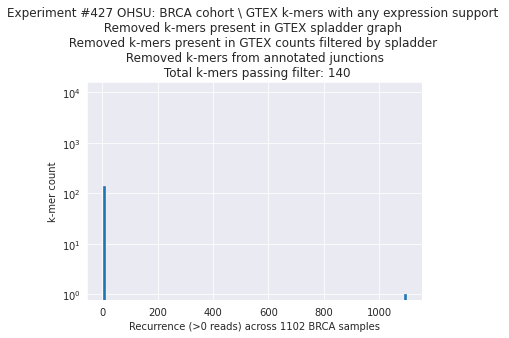

In [98]:
# Other variant 
tmp = df_plot_c.loc[(df_plot_c['junctionAnnotated_kmer'] == 0.0) &
                    
                   (df_plot_c['recurrence'] > 0) &
                    
                  (df_plot_c['GTEX_presence'] == 0) & 
                    
                  (df_plot_c['spladder_GTEX_on_disk'] == 0) , 
                    
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1 )
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers present in GTEX spladder graph  \n Removed k-mers present in GTEX counts filtered by spladder  \n Removed k-mers from annotated junctions \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)


number of kmers 756
save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_removed_GTEX_spladder.png


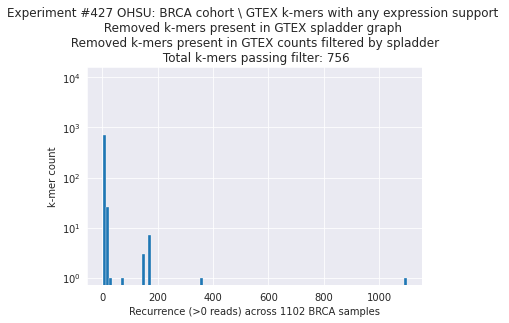

In [92]:
tmp = df_plot_c.loc[
                   (df_plot_c['recurrence'] > 0) &
                    
                  (df_plot_c['GTEX_presence'] == 0) & 
                    (df_plot_c['spladder_GTEX_on_disk'] == 0) , 
                  ['recurrence', 'kmer']].drop_duplicates()
print('number of kmers', tmp.shape[0])
sns.histplot(data = tmp, x = 'recurrence', bins = 100, alpha = 1)
n_kmers = tmp['kmer'].unique().shape[0]
mytitle = f"Experiment #427 OHSU: BRCA cohort \ GTEX k-mers with any expression support \n Removed k-mers present in GTEX spladder graph  \n Removed k-mers present in GTEX counts filtered by spladder \n Total k-mers passing filter: {n_kmers}"
plt.title(mytitle)  
plt.yscale("log")  
plt.xlabel(Xlabel)
plt.ylabel(Ylabel)
sns.set_style("darkgrid")
plt.ylim(top=10**4.2) 
ax.get_xaxis().set_minor_locator(AutoMinorLocator())
ax.get_yaxis().set_minor_locator(AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         'removed_GTEX_spladder'
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()

#tmp = tmp.loc[(tmp['recurrence'] > 30) , :]
#myplot_collect['original ohsu result recurrence > 30 \ GTEX spladder junctions and GTEX graph and Junction annot' ] = tmp['kmer'].values

# Intersection 

In [71]:
from upsetplot import UpSet
from upsetplot import from_contents

save to /cluster/work/grlab/projects/projects2020_OHSU/plots/MS_single_sample_plots/debugging/v2_v2.5f0752a_with_v2_v3_d2d2574_conf2_BRCA_fix-sample_filtered-spladder_Experiment-#427-OHSU-Set-overlap-between-k-mers-present-in-GTEX-counts-filtered-by-spladder-k-mers-present-in-GTEX-spladder-graph-k-mers-from-annotated-junctions-.png


<Figure size 720x1800 with 0 Axes>

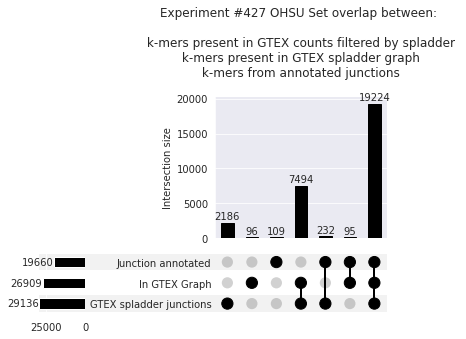

In [72]:
myplot = from_contents(myplot_collect)

plt.figure(figsize=(10,25))
upset = UpSet(myplot, show_counts=True)#, intersection_plot_elements=50,
                         #show_percentages=show_percentages,
#                          min_subset_size=min_subset_size, 
#                          max_subset_size=max_subset_size, min_degree=min_degree
             
upset.plot()
mytitle = f"Experiment #427 OHSU Set overlap between: \n \n k-mers present in GTEX counts filtered by spladder \n k-mers present in GTEX spladder graph \n k-mers from annotated junctions \n "
plt.title(mytitle)  
save_path = os.path.join(plot_dir, base_plot + '_'+ save_suffix + '_' +
                         mytitle.replace(': ', '').replace('\n', '').replace('  ', '-').replace(' ', '-')
                         + '.png')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight', dpi = 300)
plt.show()




# TEST Extract remaining

In [24]:
## DEBUG: high recurrence, junction non annotated, not in GTEX
remaining_recurrenct = df_plot.merge(tmp, on = 'kmer', how = 'right')

## DEBUG: high recurrence, junction non annotated, not in GTEX
## Look if they come from >1 junction position 
## (bug in Andy files, = bug in junction annotated) 

remaining_recurrenct2 = pd.DataFrame.from_records(
    remaining_recurrenct.groupby(['kmer',  'jx_pos']).count().index)

display(remaining_recurrenct2.head())

remaining_recurrenct3 = remaining_recurrenct2.groupby([0]).count().reset_index().rename(
    {0:'kmer', 1:'number_jx_pos'}, axis = 1)

remaining_recurrenct3 = remaining_recurrenct3.loc[
    remaining_recurrenct3['number_jx_pos'] == 1, :]

remaining_recurrenct3 = df_plot.merge(remaining_recurrenct3, on = 'kmer', how = 'right')

display(remaining_recurrenct3.head())
display(remaining_recurrenct3.shape)
display(remaining_recurrenct3['jx_coord'].unique().shape)

,0,1
0,AAAALQQHS,56.0
1,AAAALQQHS,57.0
2,AAEHLRVPS,125.0
3,AAGGLHGEF,24.0
4,AALARWRAN,13.0


,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,MHC-I binding status,number_jx_pos
0,94,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
1,87,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
2,132,24.0,1.0,0.0,0.0,ENSG00000164692.17,94409797_94415225,AAGGLHGEF,0,0,...,0.0,0.0,0.0,0.0,True,0.0,0.0,146.0,not computed,1
3,188,9.0,0.0,0.0,1.0,ENSG00000172354.10,100677527_100678475,AALLLGAPH,0,0,...,0.0,0.0,0.0,0.0,True,0.0,0.0,76.0,weak binder,1
4,524,20.0,1.0,0.0,0.0,ENSG00000138614.15,65610685_65607320,ADGKAKEQG,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,17.0,not binder,1


(866, 1126)

(149,)

(array([705.,  73.,  32.,   4.,  19.,   0.,   0.,   4.,   9.,  20.]),
 array([ 11. , 102.1, 193.2, 284.3, 375.4, 466.5, 557.6, 648.7, 739.8,
        830.9, 922. ]),
 <BarContainer object of 10 artists>)

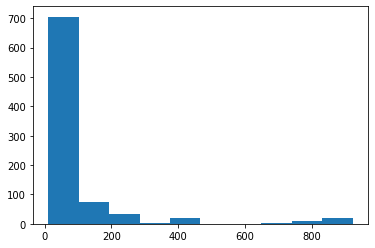

In [25]:
plt.hist(remaining_recurrenct3['recurrence'])

In [26]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , :]

,>pepID,jx_pos,between_codons,includes_5',includes_3',gene,jx_coord,kmer,readFrameAnnotated,junctionAnnotated,...,TCGAXXA89901A11RA36F07all,TCGAXXA89A01A11RA36F07all,TCGAZ7A8R501A42RA41B07all,TCGAZ7A8R601A11RA41B07all,isCrossJunction,junctionAnnotated_kmer,readFrameAnnotated_kmer,recurrence,MHC-I binding status,number_jx_pos
0,94,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
1,87,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AAEHLRVPS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
12,890,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,AEHLRVPSS,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,weak binder,1
63,4018,125.0,0.0,0.0,1.0,ENSG00000177383.5,184711444_184709731,ARAAEHLRV,1,0,...,0.0,0.0,0.0,0.0,True,0.0,1.0,457.0,not binder,1
143,15690,16.0,0.0,0.0,1.0,ENSG00000057608.17,5781219_5765717,ETVFFNLLI,0,0,...,3.0,2.0,3.0,1.0,True,0.0,0.0,922.0,weak binder,1
144,15726,16.0,0.0,0.0,1.0,ENSG00000057608.17,5781219_5765717,ETVFFNLLI,0,0,...,3.0,2.0,3.0,1.0,True,0.0,0.0,922.0,weak binder,1
150,15789,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
151,15790,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
152,15791,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026044,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1
153,15792,12.0,0.0,0.0,1.0,ENSG00000131652.14,3025961_3026062,FELRSQRGN,0,0,...,1.0,1.0,1.0,0.0,True,0.0,0.0,424.0,weak binder,1


In [27]:
remaining_recurrenct3.loc[(remaining_recurrenct3['recurrence'] > 300 ) & 
                          ((remaining_recurrenct3['TCGABHA18V01A11RA12D07all'] > 0) | 
                          (remaining_recurrenct3['TCGAC8A12P01A11RA11507all'] > 0) | 
                          (remaining_recurrenct3['TCGAAOA0JM01A21RA05607all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0SX01A12RA08407all'] > 0) | 
                          (remaining_recurrenct3['TCGAA2A0D201A21RA03407all'] > 0) ) , 
                          ['recurrence', 'jx_coord', 'gene', 'kmer', 'peptide']].drop_duplicates()


,recurrence,jx_coord,gene,kmer,peptide
0,457.0,184711444_184709731,ENSG00000177383.5,AAEHLRVPS,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
12,457.0,184711444_184709731,ENSG00000177383.5,AEHLRVPSS,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
63,457.0,184711444_184709731,ENSG00000177383.5,ARAAEHLRV,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
143,922.0,5781219_5765717,ENSG00000057608.17,ETVFFNLLI,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS
150,424.0,3025961_3026044,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNSAFLFSP
153,424.0,3025961_3026062,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNP
154,424.0,3025961_3026084,ENSG00000131652.14,FELRSQRGN,LVLCFELRSQRGNMVSTDRHLLSAGDGEVKAWLWAEMLKK
229,922.0,5781219_5765717,ENSG00000057608.17,HLETVFFNL,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS
233,457.0,184711444_184709731,ENSG00000177383.5,HLRVPSSTK,MLQTPESRGLPVPQAEGEKDGGHDGETRAPTASQERPKEELGAGRE...
259,922.0,5781219_5765717,ENSG00000057608.17,IHLETVFFN,SFIILSVHLNLIHLETVFFNLLISVAMCCCCSRAGSIQVVCHLSS


In [28]:
remaining_recurrenct3.shape

(866, 1126)

In [98]:
# remaining_recurrenct3.to_csv(
#     os.path.join(gene_eq_path, 
#                  'exp-427_novel-pep_jx-non-annotated_jx-not-GTEX_recurrence-min-10.csv'), 
#     index = None)
# print(gene_eq_path)

/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/v2_v3_d2d2574_conf2_annotFrame_cap0_runs/TCGA_Breast_1102
